In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from data_loader_batch import FrEnParallelCorpusDataset, collate_fn_cuda
%matplotlib inline

In [3]:
def parse_training_data(training_results_file, validation_results_file):
    with open(training_results_file, "r") as training_res_file:
        training_scores = [float(i) for i in training_res_file.readlines()]
    with open(validation_results_file, "r") as validation_res_file:
        validation_scores = [float(i) for i in validation_res_file.readlines()]
    return training_scores, validation_scores

In [4]:
def visualize_training_data(training_scores, validation_scores):
    iterations = range(1, len(training_scores) + 1)
    plt.figure()
    plt.plot(iterations, validation_scores, label="Validation BLEU")
    plt.legend()

In [5]:
def find_best_performing_epoch(validation_scores):
    score = max(validation_scores)
    epoch = validation_scores.index(score)
    print(f"Epoch with best performance: {epoch}, BLEU: {score*100}")
    return epoch

In [6]:
def process_training_results(training_results_file, validation_results_file):
    # Parse results
    training_scores, validation_scores = parse_training_data(
        training_results_file=training_results_file,
        validation_results_file=validation_results_file
    )
    # Plot results
    visualize_training_data(training_scores, validation_scores)
    # Determine Best Epoch For Performance
    find_best_performing_epoch(validation_scores)
    return validation_scores

Epoch with best performance: 29, BLEU: 16.692608716175307


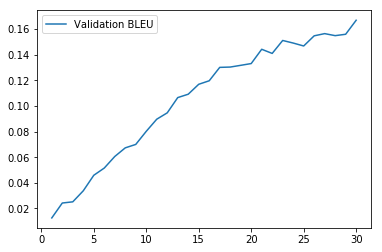

In [8]:
positional_enc = process_training_results("./models/loss_training.txt", "./models/bleu_validation.txt")

Epoch with best performance: 17, BLEU: 22.892772543644323


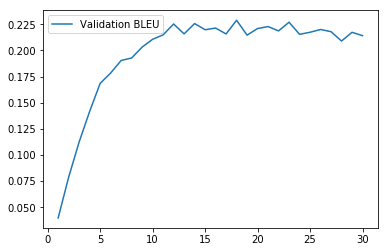

In [10]:
gru_enc = process_training_results("./models/n_loss_training_gru_enc_1000.txt", "./models/n_bleu_validation_gru_enc_1000.txt")

Epoch with best performance: 17, BLEU: 27.869590886368144


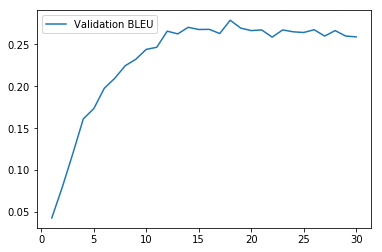

In [12]:
multi_enc = process_training_results("./models/n_loss_training_gru_enc_multi_1000.txt", "./models/n_bleu_validation_gru_enc_multi_1000.txt")

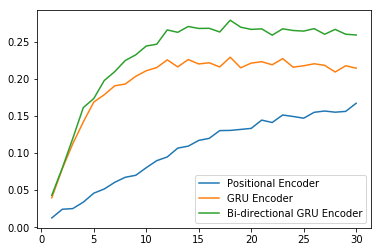

In [14]:
plt.figure()
iterations = range(1, len(multi_enc) + 1)
plt.plot(iterations, positional_enc, label="Positional Encoder")
plt.plot(iterations, gru_enc, label="GRU Encoder")
plt.plot(iterations, multi_enc, label="Bi-directional GRU Encoder")
plt.legend()

In [25]:
import matplotlib.ticker as ticker

def visualize_attention_sentence(alphas, source_sentence, target_sentence):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(alphas, cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + source_sentence, rotation=90)
    ax.set_yticklabels([''] + target_sentence)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [37]:
pred_multi = ['a', 'bicyclist', 'is', 'wearing', 'headphones', '.']
source = ['un', 'cycliste', 'porte', 'un', 'casque', '.']

In [38]:
multi_vals = np.load("./predictions/alphas_multi.npy")

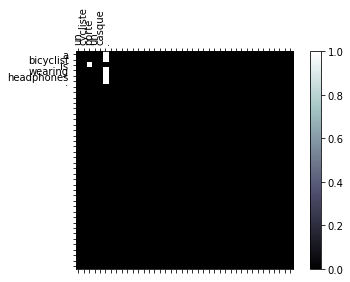

In [40]:
visualize_attention_sentence(multi_vals, source, pred_multi)